# Creating a logistic regression to predict absenteeism

## Import the relevant libraries

In [141]:
import pandas as pd
import numpy as np

## Load the data

In [143]:
data_preprocessed = pd.read_csv('Absenteeism_preprocessed.csv')
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Create the targets

In [145]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [146]:
# set the targets 1 if the Absenteeism Time in Hourse is above the median of the sample (3), otherwise set it to 0
# np.where can be use to give values
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [147]:
data_preprocessed['Excessive Absenteeism'] = targets

In [148]:
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


## A comment on the targets

In [150]:
# targets.sum are targets that have 1s
# targets.shape[0] is the total targets
targets.sum() / targets.shape[0]

# result is that 1s are 46% of the total targets
# A balance of 45-55 is almost always sufficient

0.45571428571428574

Drop the 'Absenteeism Time in Hours' column for the dataframe

In [152]:
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours', 'Day of the Week', 'Daily Work Load Average', 
                                            'Distance to Work'], axis = 1)

In [153]:
data_with_targets is data_preprocessed

False

In [154]:
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0


## Select the inputs for the regression

In [156]:
data_with_targets.shape

(700, 12)

In [157]:
# inputs are all columns EXCEPT the last column
# let us select all the columns except the last column
# we can use short in iloc
data_with_targets.iloc[:,:-1]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,7,179,40,22,1,2,0
696,1,0,0,0,7,225,28,24,0,1,2
697,1,0,0,0,7,330,28,25,1,0,0
698,0,0,0,1,7,235,32,25,1,0,0


In [158]:
# the inputs that we selected are all unscaled, then we will assign it to a new variable named 'unscaled inputs'
unscaled_inputs = data_with_targets.iloc[:,:-1]
unscaled_inputs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1


## Standardize the data

In [160]:
# import a module for scaling the inputs
#from sklearn.preprocessing import StandardScaler

# let's create an empty for scaler object
# scaler will be used to subtract the mean and divide by the standard deviation variablewise(featurewise)
#absenteeism_scaler = StandardScaler()

In [161]:
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler



class CustomScaler(BaseEstimator, TransformerMixin):

   

    def __init__(self,columns):

        self.scaler = StandardScaler()

        self.columns = columns       

       

    def fit(self, X):       

        self.scaler.fit(X[self.columns])       

        return self

   

    def transform(self, X):       

        init_col_order = X.columns

        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns = self.columns)

        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]

        return pd.concat([X_not_scaled, X_scaled], axis = 1) [init_col_order]

In [162]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [163]:
# columns_to_scale = ['Month Value',
#        'Day of the Week', 'Transportation Expense', 'Distance to Work',
#        'Age', 'Daily Work Load Average', 'Body Mass Index',
#        'Children', 'Pets']

columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Education']

In [164]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]
columns_to_scale

['Month Value',
 'Transportation Expense',
 'Age',
 'Body Mass Index',
 'Children',
 'Pets']

In [165]:
absenteeism_scaler = CustomScaler(columns_to_scale)

In [166]:
# Calculate and store the mean and the standarda deviation
absenteeism_scaler.fit(unscaled_inputs)

CustomScaler(columns=['Month Value', 'Transportation Expense', 'Age',
                      'Body Mass Index', 'Children', 'Pets'])

In [167]:
# transform -> does the actual scaling

# new_data_raw = pd.read_csv('new_data.csv')
# new_data_scaled = new_data_scaler.transform(new_data_raw)
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.0,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.0,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.0,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.0,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.0,1.005844,-0.536062,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,0.0,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,0.0,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,0.0,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,0.0,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690


In [168]:
scaled_inputs.shape

(700, 11)

## Split the data into train & test and shuffle

### Import the relevant module

In [171]:
# sklearn.model_selection.train_test_split(inputs, targets)
from sklearn.model_selection import train_test_split

### Split

In [173]:
train_test_split(scaled_inputs, targets)

[     Reason_1  Reason_2  Reason_3  Reason_4  Month Value  \
 494         0         0         0         1          0.0   
 399         0         0         0         1          0.0   
 214         0         0         0         0          0.0   
 227         1         0         0         0          0.0   
 113         0         0         0         1          0.0   
 ..        ...       ...       ...       ...          ...   
 340         0         0         0         1          0.0   
 285         0         0         0         0          0.0   
 171         0         0         0         1          0.0   
 449         0         0         0         1          0.0   
 186         0         0         0         1          0.0   
 
      Transportation Expense       Age  Body Mass Index  Education  Children  \
 494                0.568211 -0.065439        -0.878984          0  2.679969   
 399                2.092381 -1.320435         0.061825          0 -0.019280   
 214                1.6245

In [174]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20) # we can set the size for training and testing by specifying train_size argument

In [175]:
print(x_train.shape, y_train.shape)

(560, 11) (560,)


In [176]:
print(x_test.shape, y_test.shape)

(140, 11) (140,)


## Logistic Regression with sklearn

In [178]:
# import the relevant modules
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Training the model

In [180]:
reg = LogisticRegression()

In [181]:
reg.fit(x_train, y_train)

LogisticRegression()

In [182]:
reg.score(x_train, y_train)

0.7714285714285715

### Manually check the accuracy

Reasons:

1. It is always good to have full understanding of what we are doing
2. We will be using this idea later on in the exercise

In [184]:
# manually predic the x_train by using reg.predict()
model_outputs = reg.predict(x_train)
model_outputs

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [185]:
# the actual prediction outcome
y_train

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [186]:
model_outputs == y_train

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [187]:
# calculate the total number of CORRECT predictions ("True" entries)
np.sum((model_outputs == y_train))

432

In [188]:
# Find the total observations
model_outputs.shape[0]

560

In [189]:
# Accuracy = correct predictions / # of predictions
np.sum((model_outputs == y_train)) / model_outputs.shape[0]

0.7714285714285715

The same result with the reg.score(x, y)! But it helps us to have good understand of what happened.

### Finding the intercept and coefficients

In [192]:
reg.intercept_

array([-1.61056067])

In [193]:
reg.coef_

array([[ 2.77305551,  0.93139448,  3.0951842 ,  0.8103186 ,  0.        ,
         0.62614701, -0.17399611,  0.28753491, -0.2424232 ,  0.35798106,
        -0.27308859]])

In [194]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [195]:
# Assign names for coefficients by column names
feature_name = unscaled_inputs.columns.values

In [196]:
# create a dataframe summary table with columns Feature name and Coefficients side by side
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_) # we need to transpose because it is row format and we need a column
summary_table

,Feature name,Coefficient
0,Reason_1,2.773056
1,Reason_2,0.931394
2,Reason_3,3.095184
3,Reason_4,0.810319
4,Month Value,0.000000
5,Transportation Expense,0.626147
6,Age,-0.173996
7,Body Mass Index,0.287535
8,Education,-0.242423
9,Children,0.357981


In [197]:
# We need to append the intercept to the first index but no method
# We can fix by using this code:
summary_table.index = summary_table.index + 1 # we are moving all the indices to next so that index[0] will be empty
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.610561
1,Reason_1,2.773056
2,Reason_2,0.931394
3,Reason_3,3.095184
4,Reason_4,0.810319
5,Month Value,0.000000
6,Transportation Expense,0.626147
7,Age,-0.173996
8,Body Mass Index,0.287535
9,Education,-0.242423


## Interpreting coefficients

Coefficients are weights (means how much we value the feature). The closer they [the weights] to 0, the _smaller_ the weight. Alternatively, the further away from zero, either negative or positive,  the bigger the weight of this feature.

**Standardized coefficients** are basically: the coefficients of a regression where all variables have been standardized

"Whichever weights is _bigger_, its corresponding feature is _more important_."

In [199]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,-1.610561,0.199776
1,Reason_1,2.773056,16.007470
2,Reason_2,0.931394,2.538046
3,Reason_3,3.095184,22.091307
4,Reason_4,0.810319,2.248624
5,Month Value,0.000000,1.000000
6,Transportation Expense,0.626147,1.870390
7,Age,-0.173996,0.840300
8,Body Mass Index,0.287535,1.333137
9,Education,-0.242423,0.784724


In [200]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Reason_3,3.095184,22.091307
1,Reason_1,2.773056,16.007470
2,Reason_2,0.931394,2.538046
4,Reason_4,0.810319,2.248624
6,Transportation Expense,0.626147,1.870390
10,Children,0.357981,1.430439
8,Body Mass Index,0.287535,1.333137
5,Month Value,0.000000,1.000000
7,Age,-0.173996,0.840300
9,Education,-0.242423,0.784724


**Odds Ratio**

A feature is **NOT** particularly important:
- if its coefficient is around 0 => this implies that no matter the feature value, we will multiply it by 0 (in the model)
- if its odds ratio is around 1 => for a unit change in the standardized feature, the odds increase by a multiple equal to the odds ratio (1 = no change)

Example:
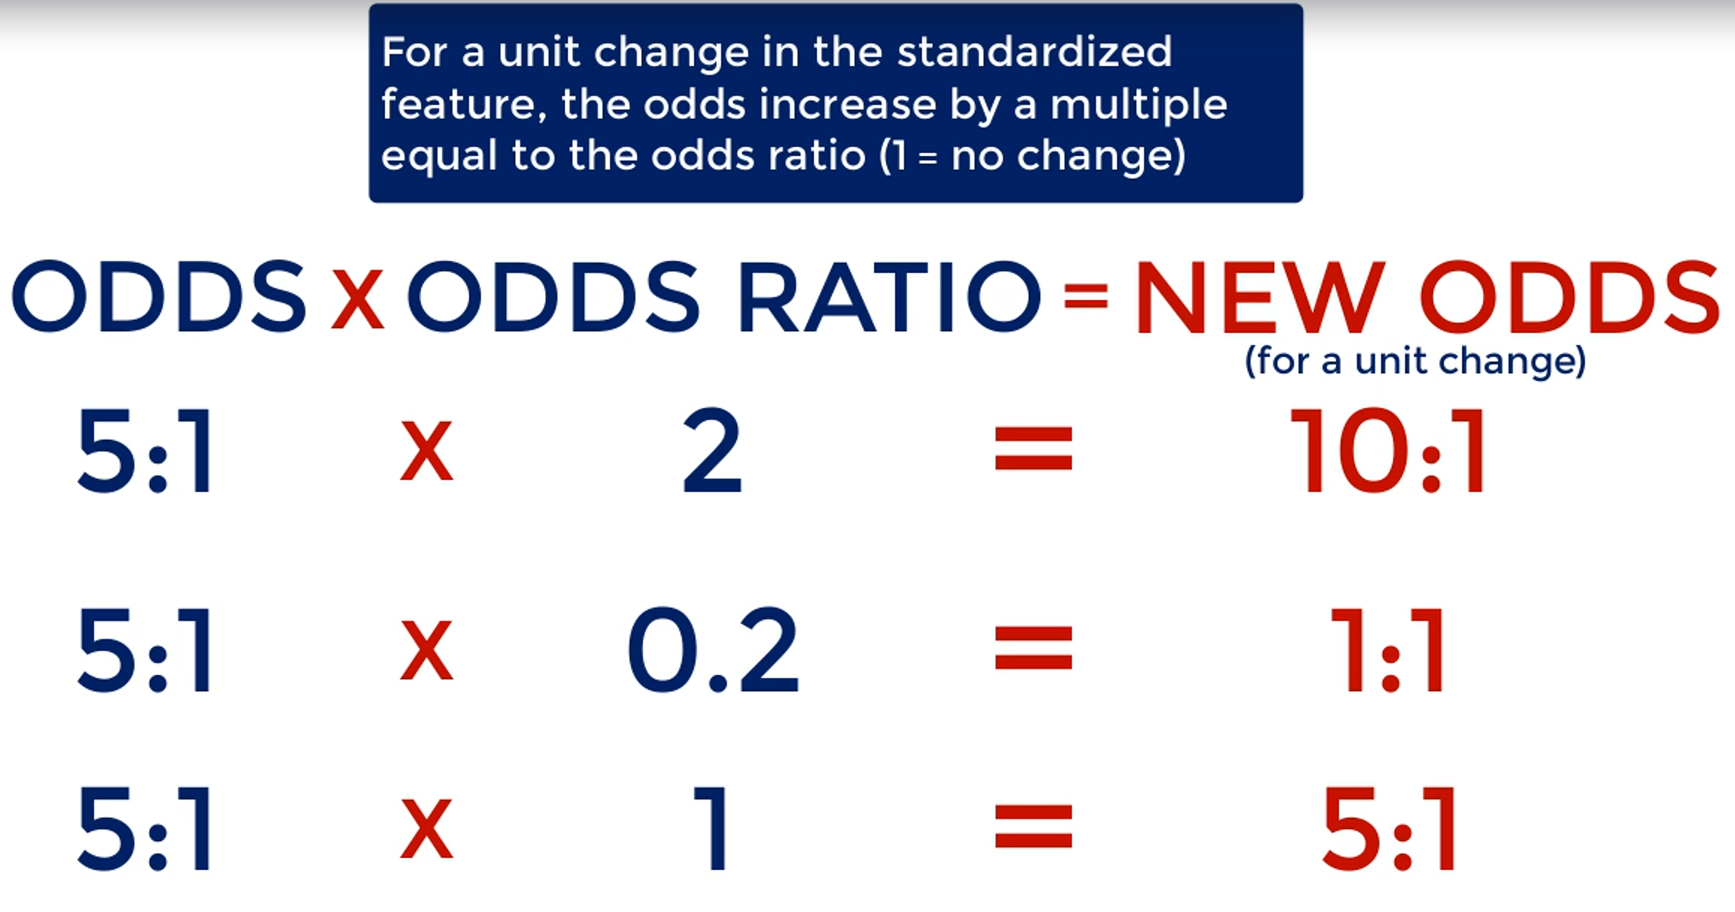

## Testing the model

Goal: To test the accuracy

In [203]:
reg.score(x_test, y_test)

0.7285714285714285

In [204]:
predicted_proba = reg.predict_proba(x_test)
predicted_proba

array([[0.75633723, 0.24366277],
       [0.60993456, 0.39006544],
       [0.48613797, 0.51386203],
       [0.75633723, 0.24366277],
       [0.08337563, 0.91662437],
       [0.30363773, 0.69636227],
       [0.30349703, 0.69650297],
       [0.11548023, 0.88451977],
       [0.73983578, 0.26016422],
       [0.75633723, 0.24366277],
       [0.50646806, 0.49353194],
       [0.19557343, 0.80442657],
       [0.06183418, 0.93816582],
       [0.7039555 , 0.2960445 ],
       [0.29516586, 0.70483414],
       [0.52027284, 0.47972716],
       [0.50646806, 0.49353194],
       [0.50646806, 0.49353194],
       [0.36625975, 0.63374025],
       [0.06475263, 0.93524737],
       [0.73983578, 0.26016422],
       [0.75633723, 0.24366277],
       [0.48049704, 0.51950296],
       [0.48049704, 0.51950296],
       [0.22447943, 0.77552057],
       [0.73983578, 0.26016422],
       [0.51107509, 0.48892491],
       [0.87742917, 0.12257083],
       [0.24009415, 0.75990585],
       [0.75633723, 0.24366277],
       [0.

In [205]:
predicted_proba.shape

(140, 2)

In [206]:
predicted_proba[:,1]

array([0.24366277, 0.39006544, 0.51386203, 0.24366277, 0.91662437,
       0.69636227, 0.69650297, 0.88451977, 0.26016422, 0.24366277,
       0.49353194, 0.80442657, 0.93816582, 0.2960445 , 0.70483414,
       0.47972716, 0.49353194, 0.49353194, 0.63374025, 0.93524737,
       0.26016422, 0.24366277, 0.51950296, 0.51950296, 0.77552057,
       0.26016422, 0.48892491, 0.12257083, 0.75990585, 0.24366277,
       0.39006544, 0.71455727, 0.69636227, 0.49353194, 0.24366277,
       0.59516789, 0.26016422, 0.78125277, 0.43808933, 0.60697272,
       0.24366277, 0.49860744, 0.26016422, 0.40716109, 0.80823893,
       0.59873094, 0.72128673, 0.24366277, 0.24554175, 0.24366277,
       0.49860744, 0.29080977, 0.69636227, 0.24554175, 0.81990438,
       0.39006544, 0.90542334, 0.26661136, 0.31976407, 0.31976407,
       0.70573493, 0.69636227, 0.26661136, 0.77552057, 0.24378543,
       0.24366277, 0.07488949, 0.26016422, 0.76175631, 0.2960445 ,
       0.26016422, 0.31667017, 0.88269468, 0.43808933, 0.59516

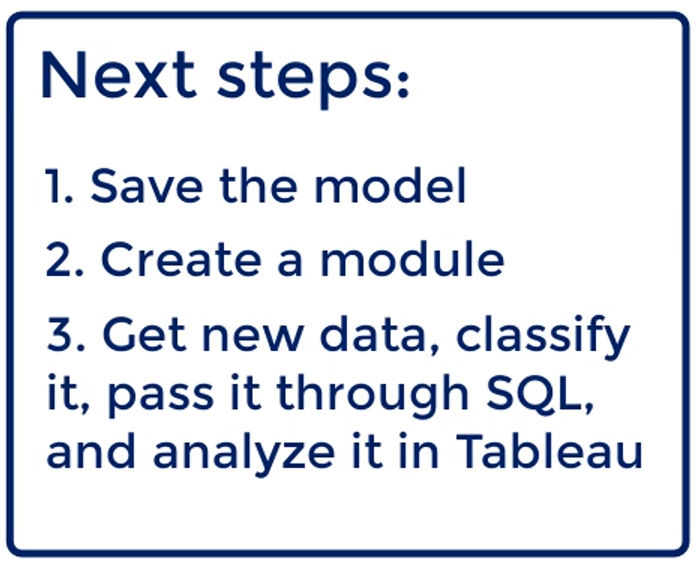

## Save the model

In [209]:
import pickle

In [210]:
with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [211]:
# absenteeism_scaler
with open('scaler', 'wb') as file:
    pickle.dump(absenteeism_scaler, file)